# **Libraries**

In [4]:

import tensorflow as tf
from tensorflow.keras import layers,models
import numpy as np
import matplotlib.pyplot as plt




# **Loading datasets**

In [9]:

mnist=tf.keras.datasets.mnist
fashion_mnist=tf.keras.datasets.fashion_mnist

mnist
fashion_mnist


<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

# **Test and Train Classification**

In [10]:
(train_image_mnist, train_labels_mnist), (test_images_mnist, test_labels_mnist) = mnist.load_data()
(train_images_fashion_mnist, train_labels_fashion_mnist), (test_images_fashion_mnist, test_labels_fashion_mnist) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


# **Preprocessing the data**

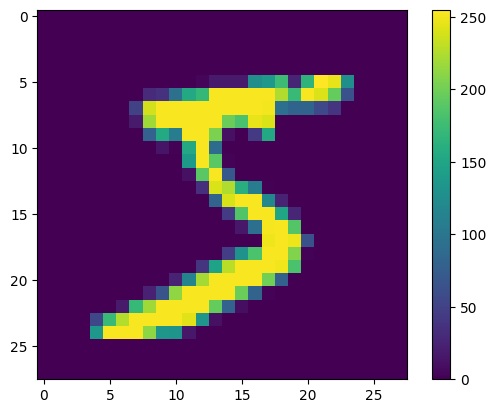

In [13]:
#for mnist data
plt.figure()
plt.imshow(train_image_mnist[0])
plt.colorbar()
plt.grid(False)
plt.show()

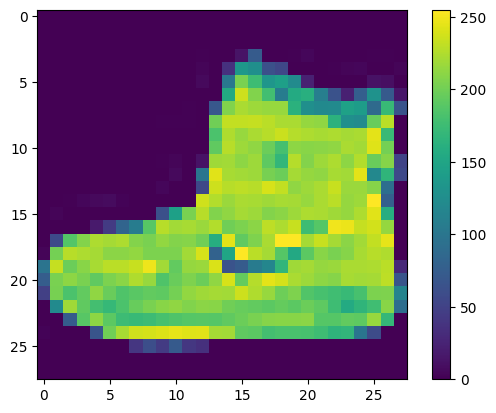

In [17]:
#for fashion mnist data
plt.figure()
plt.imshow(train_images_fashion_mnist[0])
plt.colorbar()
plt.grid(False)
plt.show()

Converting from range 0-255 to 0-1 to feed to NN

In [19]:
train_images_mnist = train_image_mnist / 255.0
test_images_mnist = test_images_mnist / 255.0

train_images_fashion = train_images_fashion_mnist / 255.0
test_images_fashion = test_images_fashion_mnist / 255.0

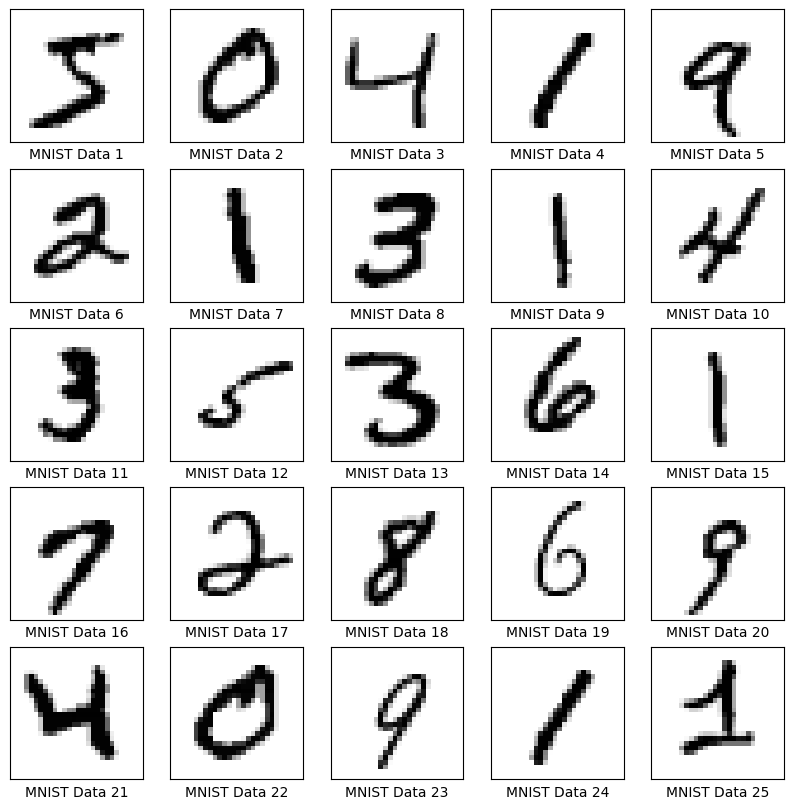

In [27]:
#printing first 25 from mnist data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_image_mnist[i], cmap=plt.cm.binary)
    plt.xlabel(f"MNIST Data {i+1}")
plt.show()

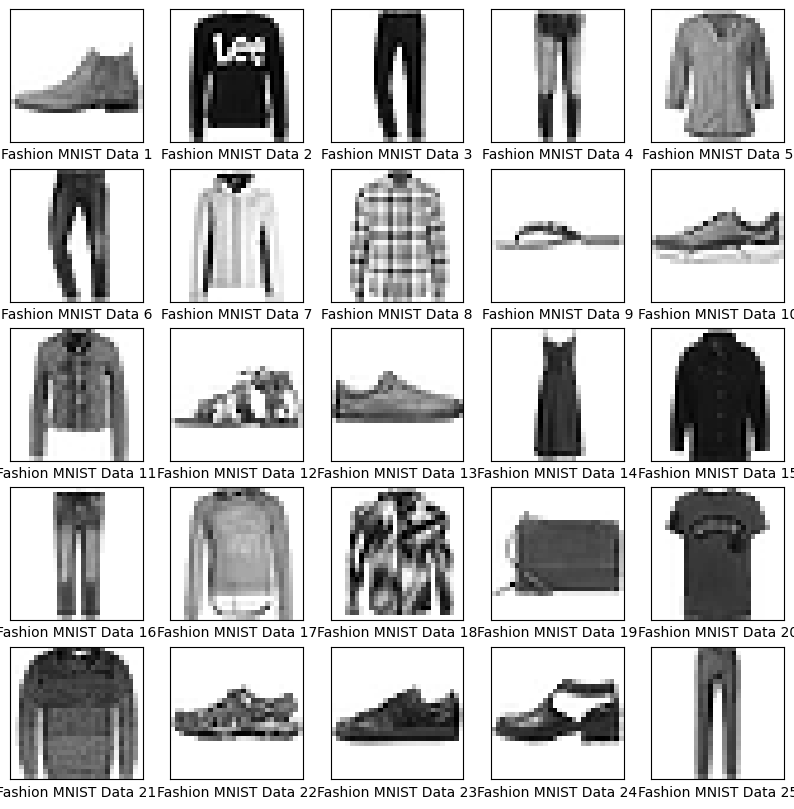

In [28]:
#printing first 25 from fashion_mnist data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images_fashion_mnist[i], cmap=plt.cm.binary)
    plt.xlabel(f"Fashion MNIST Data {i+1}")
plt.show()

# **Building the models**

**Single Layer Network**

In [31]:
model_sln=models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(10,activation='softmax')
])

Multi Layer Network

In [32]:
model_mlp = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

Fully Connected DNN

In [33]:
model_dnn = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# **Compiling Models**

SLN

In [34]:
model_sln.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

MLN

In [35]:
model_mlp.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Fully connected DNN

In [36]:
model_dnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# **Training**

SLN

In [42]:
#mnist
print("MNIST")
#fit
model_sln.fit(train_image_mnist, train_labels_mnist, epochs=10)
#evaluation
test_loss_sln_mnist, test_acc_sln_mnist = model_sln.evaluate(test_images_mnist, test_labels_mnist, verbose=2)


#fashion mnist
print("Fashion MNIST")
model_sln.fit(train_images_fashion,train_labels_fashion_mnist, epochs=10)
#evaluation
test_loss_sln_fashion, test_acc_sln_fashion = model_sln.evaluate(test_images_fashion_mnist, test_labels_fashion_mnist, verbose=2)


print(f"MNIST Test Accuracy (Single Layer Network): {test_acc_sln_mnist}")
print(f"Fashion-MNIST Test Accuracy (Single Layer Network): {test_acc_sln_fashion}")

MNIST
Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 4.9968 - accuracy: 0.8952
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.0769 - accuracy: 0.8962
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.0764 - accuracy: 0.8952
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.0648 - accuracy: 0.8952
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.3041 - accuracy: 0.8946
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.1416 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.1917 - accuracy: 0.8946
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.0799 - accuracy: 0.8958
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 4.9778 - accuracy: 0.8954
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss:

MLP

In [45]:
#mnist
print("MNIST")
#fit
model_mlp.fit(train_image_mnist, train_labels_mnist, epochs=10)
#evaluation
test_loss_mlp_mnist, test_acc_mlp_mnist = model_mlp.evaluate(test_images_mnist, test_labels_mnist, verbose=2)


#fashion mnist
print("Fashion MNIST")
model_mlp.fit(train_images_fashion,train_labels_fashion_mnist, epochs=10)
#evaluation
test_loss_mlp_fashion, test_acc_mlp_fashion = model_mlp.evaluate(test_images_fashion_mnist, test_labels_fashion_mnist, verbose=2)


print(f"MNIST Test Accuracy (Multi Layer Network): {test_acc_mlp_mnist}")
print(f"Fashion-MNIST Test Accuracy (Multi Layer Network): {test_acc_mlp_fashion}")

MNIST
Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 6.3659 - accuracy: 0.8703
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5543 - accuracy: 0.8862
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4044 - accuracy: 0.9008
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3330 - accuracy: 0.9160
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2921 - accuracy: 0.9273
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2541 - accuracy: 0.9356
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2450 - accuracy: 0.9397
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2125 - accuracy: 0.9440
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2135 - accuracy: 0.9457
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss:

Fully Connected DNN

In [47]:
#mnist
print("MNIST")
#fit
model_dnn.fit(train_image_mnist, train_labels_mnist, epochs=10)
#evaluation
test_loss_dnn_mnist, test_acc_dnn_mnist = model_dnn.evaluate(test_images_mnist, test_labels_mnist, verbose=2)


#fashion mnist
print("Fashion MNIST")
model_dnn.fit(train_images_fashion,train_labels_fashion_mnist, epochs=10)
#evaluation
test_loss_dnn_fashion, test_acc_dnn_fashion = model_dnn.evaluate(test_images_fashion_mnist, test_labels_fashion_mnist, verbose=2)


print(f"MNIST Test Accuracy (Fully Connected DNN): {test_acc_dnn_mnist}")
print(f"Fashion-MNIST Test Accuracy (Fully Connected DNN): {test_acc_dnn_fashion}")

MNIST
Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 4.6891 - accuracy: 0.6635
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4930 - accuracy: 0.8709
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3162 - accuracy: 0.9155
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2535 - accuracy: 0.9356
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2308 - accuracy: 0.9435
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1879 - accuracy: 0.9546
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1659 - accuracy: 0.9583
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1510 - accuracy: 0.9638
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1250 - accuracy: 0.9687
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - los

**TEST ACCURACY ANALYSIS**

*Method Comparison:*

**Single Layer Network:** Simplest model, suitable for basic tasks. Achieves moderate accuracy.

**Multi-Layer Perceptron (MLP):** Adds hidden layers, allowing for more complex relationships. Improved accuracy compared to single layer.

**Fully Connected DNN:** More layers and neurons, increasing model complexity. Generally achieves the highest accuracy but may require more computational resources.






*Conclusion*:
 The choice of method depends on the specific task and desired trade-off between model complexity and accuracy. For simpler tasks, a single layer network may suffice, while complex tasks may require fully connected DNNs for optimal performance.

# **Predections**

SLN

MNIST

In [51]:
pred_sln_mnist=model_sln.predict(test_images_mnist)
pred_sln_mnist[0]
np.argmax(pred_sln_mnist[0])
test_labels_mnist[0]

313/313 [==============================] - 0s 1ms/step


7

Fashion MNIST

In [53]:
pred_sln_fashion=model_sln.predict(test_images_fashion)
pred_sln_fashion[0]
np.argmax(pred_sln_fashion[0])
test_labels_fashion_mnist[0]

313/313 [==============================] - 0s 1ms/step


9

MLN

MNIST

In [54]:
pred_mlp_mnist=model_mlp.predict(test_images_mnist)
pred_mlp_mnist[0]
np.argmax(pred_mlp_mnist[0])
test_labels_mnist[0]

313/313 [==============================] - 2s 5ms/step


7

Fashion MNIST

In [55]:
pred_mlp_fashion=model_mlp.predict(test_images_fashion)
pred_mlp_fashion[0]
np.argmax(pred_mlp_fashion[0])
test_labels_fashion_mnist[0]

313/313 [==============================] - 1s 3ms/step


9

DNN

MNIST

In [56]:
pred_dnn_mnist=model_dnn.predict(test_images_mnist)
pred_dnn_mnist[0]
np.argmax(pred_dnn_mnist[0])
test_labels_mnist[0]

313/313 [==============================] - 1s 2ms/step


7

Fashion MNIST

In [57]:
pred_dnn_fashion=model_dnn.predict(test_images_fashion)
pred_dnn_fashion[0]
np.argmax(pred_dnn_fashion[0])
test_labels_fashion_mnist[0]

313/313 [==============================] - 1s 2ms/step


9

# **Function to plot predections**

In [60]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'



def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

**Verify Predections**

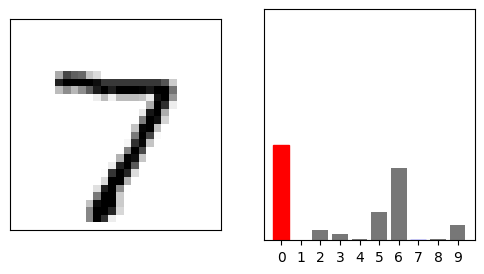

In [61]:
#just random testing
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred_sln_mnist[i], test_labels_mnist, test_images_mnist)
plt.subplot(1,2,2)
plot_value_array(i, pred_sln_mnist[i],  test_labels_mnist)
plt.show()

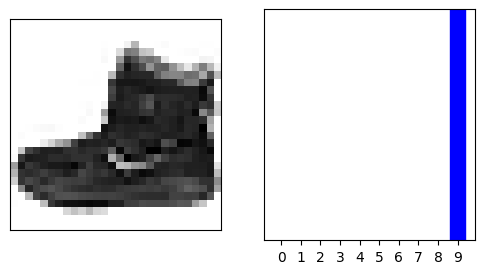

In [62]:
#just random testing
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred_dnn_fashion[i], test_labels_fashion_mnist, train_images_fashion)
plt.subplot(1,2,2)
plot_value_array(i, pred_dnn_fashion[i],  test_labels_fashion_mnist)
plt.show()

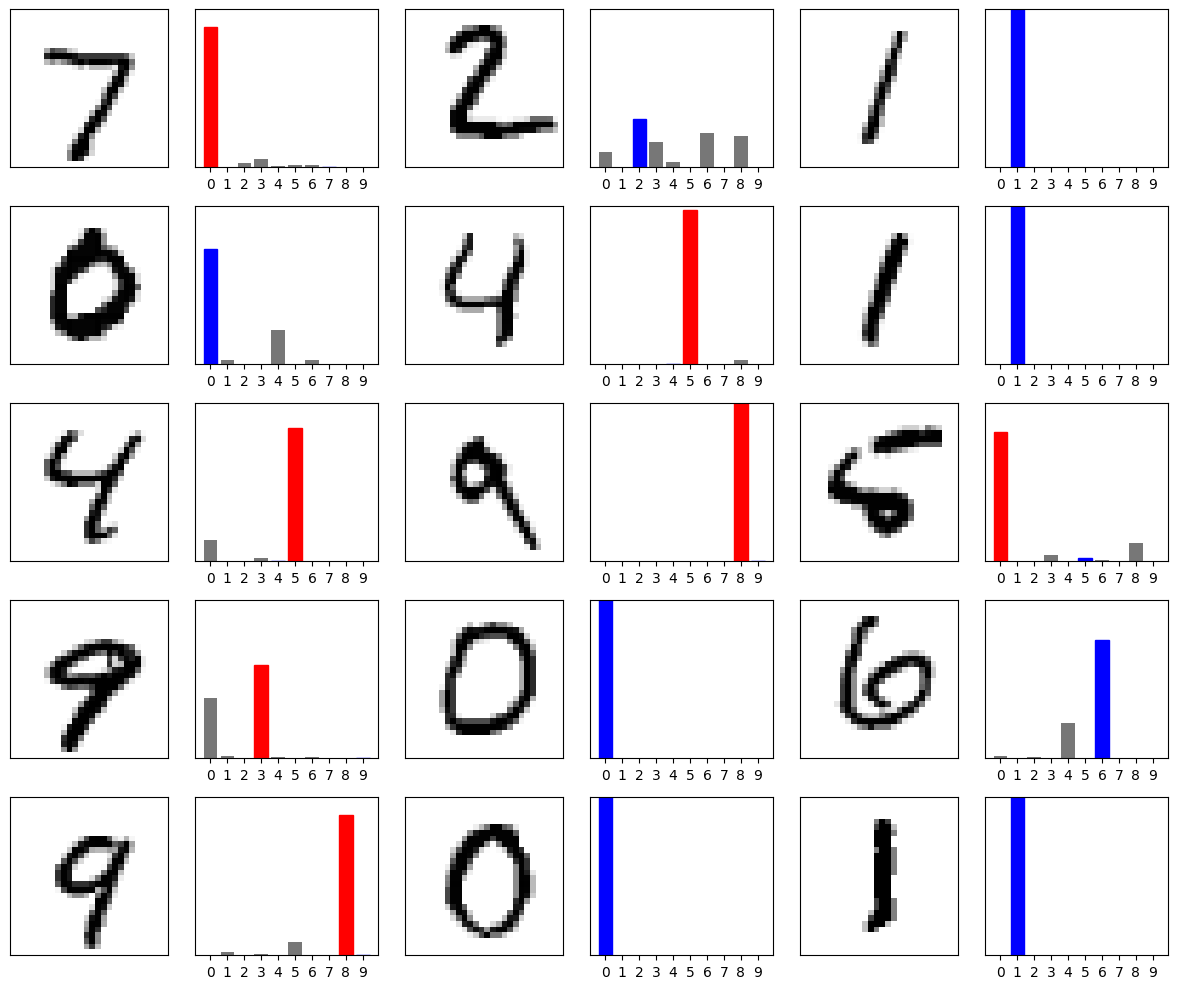

In [63]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred_dnn_mnist[i],  test_labels_mnist, test_images_mnist)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred_dnn_mnist[i], test_labels_mnist)
plt.tight_layout()
plt.show()

# **Using the trained model**

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 64ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


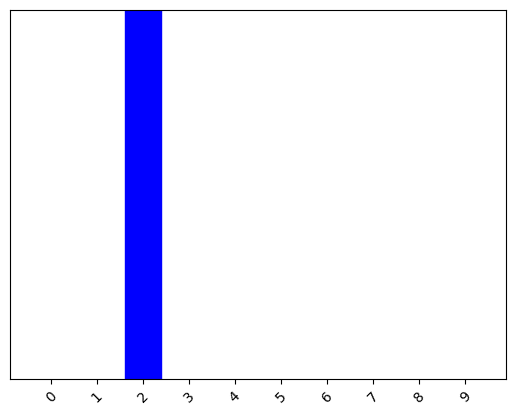

2

In [64]:
# Grab an image from the test dataset fashion mnist.
#Just done on a single dataset and only one model DNN
img = test_images_fashion_mnist[1]

print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)
predictions_single = model_dnn.predict(img)

print(predictions_single)
plot_value_array(1, predictions_single[0], test_labels_fashion_mnist)
_ = plt.xticks(range(10),  rotation=45)
plt.show()
np.argmax(predictions_single[0])